In [2]:
import numpy as np
import pandas as pd 
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
from keras.models import load_model

Using TensorFlow backend.


Total Data : 54338
Bukan Dewasa : 27192
Dewasa : 27146


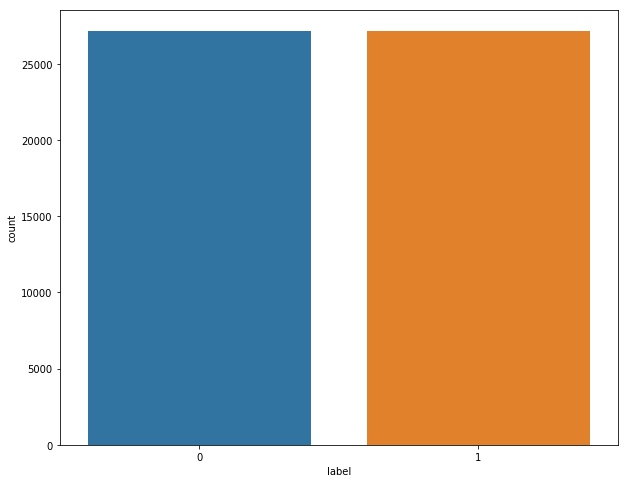

In [3]:
data = pd.read_excel("data/label/combineSSL1.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True) # memastikan tidak ada nilai yang kosong
dewasa = data.loc[data['label'] == 1, 'tweet'].copy().reset_index(drop=True)
bukan = data.loc[data['label'] == 0, 'tweet'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("Bukan Dewasa :", len(bukan))
print("Dewasa :", len(dewasa))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [0]:
# Splitting Data
text = data['tweet'].values
label = data['label'].values
data_train, data_test, label_train, label_test = train_test_split(text, label, test_size=0.33, random_state=42)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size= 0.33, random_state=42)

In [0]:
# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab = max([len(tokenizer.word_index)]) + 1 # kamus kata 
maxlen = max([len(i.split()) for i in text]) # panjang input sequence
batch_size = 128 # penentuan jumlah sample yang ditraining pada tiap epoch
num_epochs = 50 # banyak iterasi pada saat training model 
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2)

In [0]:
#Data Train
X_train = tokenizer.texts_to_sequences(data_train)
X_train = pad_sequences(X_train, maxlen=maxlen)
Y_train = to_categorical(label_train, num_classes = 2)

#Data Test
X_test = tokenizer.texts_to_sequences(data_test)
X_test = pad_sequences(X_test, maxlen=maxlen)
Y_test = to_categorical(label_test, num_classes = 2)

#Data Validation
X_val = tokenizer.texts_to_sequences(data_val)
X_val = pad_sequences(X_val, maxlen=maxlen)
Y_val = to_categorical(label_val, num_classes = 2)

In [0]:
def get_model1(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 32, input_length = maxlen, embeddings_initializer = initializer))
    model.add(LSTM(32, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def get_model2(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(LSTM(128, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def get_model3(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 32, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Dropout(0.9))
    model.add(LSTM(32, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def get_model4(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Dropout(0.9))
    model.add(LSTM(128, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        plt.xlim([0,max(history.epoch)])
        
def evaluation(model, X, Y):
    # Predict the values
    Y_pred = model.predict(X)
    Y_pred_class = np.argmax(Y_pred, axis=1)
    Y_act = Y
    # accuracy
    accuracy = accuracy_score(Y_act, Y_pred_class)
    print("Accuracy: %.2f" % (accuracy*100), "%")
    # precision
    precision = precision_score(Y_act, Y_pred_class)
    print("Precision: %.2f" % (precision*100), "%")
    # recall
    recall = recall_score(Y_act, Y_pred_class)
    print("Recall: %.2f" % (recall*100), "%")
    
    return Y_act, Y_pred_class

def conf_matrix(Y_act, Y_pred):
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d");
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Model 1 

In [8]:
model1 = get_model1(X_train, Y_train)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 58, 32)            1325248   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,333,634
Trainable params: 1,333,634
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# training model
history1 = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))


Train on 24392 samples, validate on 12014 samples
Epoch 1/50
24392/24392 [==============================] - 25s 1ms/step - loss: 0.4724 - acc: 0.7666 - val_loss: 0.1854 - val_acc: 0.9496
Epoch 2/50
24392/24392 [==============================] - 20s 800us/step - loss: 0.0872 - acc: 0.9786 - val_loss: 0.0682 - val_acc: 0.9829
Epoch 3/50
24392/24392 [==============================] - 20s 801us/step - loss: 0.0359 - acc: 0.9911 - val_loss: 0.0654 - val_acc: 0.9824
Epoch 4/50
24392/24392 [==============================] - 20s 802us/step - loss: 0.0201 - acc: 0.9952 - val_loss: 0.0665 - val_acc: 0.9807
Epoch 5/50
24392/24392 [==============================] - 19s 793us/step - loss: 0.0119 - acc: 0.9973 - val_loss: 0.0751 - val_acc: 0.9807
Epoch 6/50
24392/24392 [==============================] - 19s 784us/step - loss: 0.0083 - acc: 0.9983 - val_loss: 0.0794 - val_acc: 0.9801
Epoch 7/50
24392/24392 [==============================] - 19s 775us/step - loss: 0.0065 - acc: 0.9988 - val_loss: 0.0

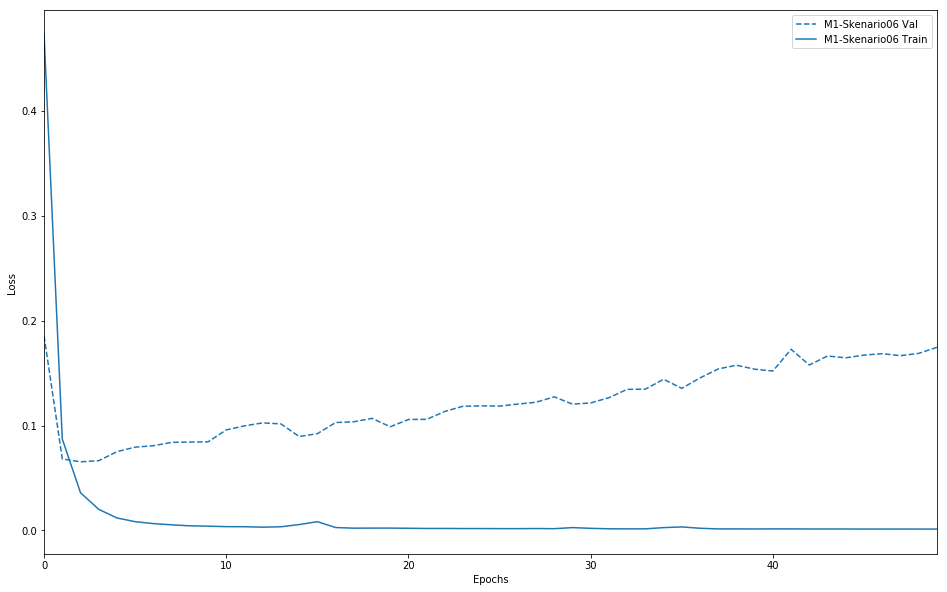

In [10]:
plot_history([('M1-Skenario06', history1)])

# Evaluasi 1

Evaluasi Data Test
Accuracy: 97.54 %
Precision: 97.87 %
Recall: 97.10 %


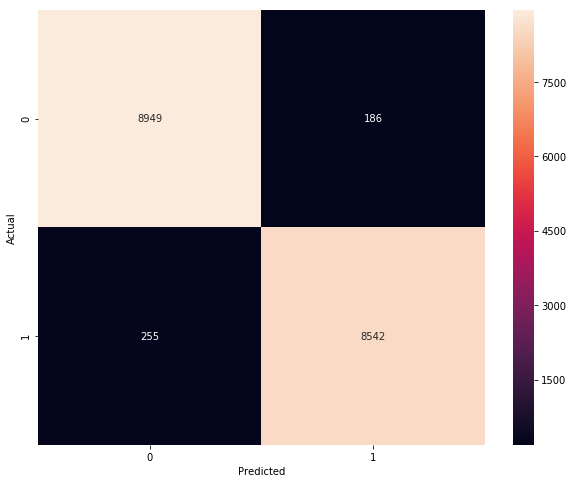

In [11]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model1, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
Accuracy: 99.95 %
Precision: 100.00 %
Recall: 99.90 %


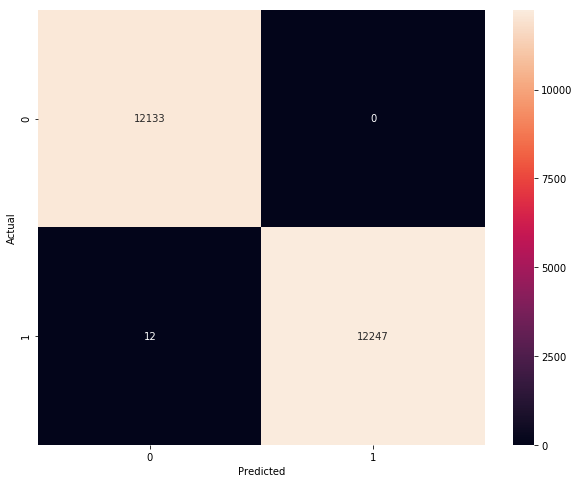

In [12]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model1, X_train, label_train)
conf_matrix(Y_act, Y_pred)

# Model 2

In [13]:
model2 = get_model2(X_train, Y_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 58, 128)           5300992   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 5,432,834
Trainable params: 5,432,834
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# training model
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))

Train on 24392 samples, validate on 12014 samples
Epoch 1/50
24392/24392 [==============================] - 19s 783us/step - loss: 0.2789 - acc: 0.8689 - val_loss: 0.0621 - val_acc: 0.9834
Epoch 2/50
24392/24392 [==============================] - 18s 747us/step - loss: 0.0398 - acc: 0.9895 - val_loss: 0.0584 - val_acc: 0.9836
Epoch 3/50
24392/24392 [==============================] - 18s 737us/step - loss: 0.0177 - acc: 0.9956 - val_loss: 0.0663 - val_acc: 0.9832
Epoch 4/50
24392/24392 [==============================] - 18s 741us/step - loss: 0.0102 - acc: 0.9973 - val_loss: 0.0736 - val_acc: 0.9808
Epoch 5/50
24392/24392 [==============================] - 18s 744us/step - loss: 0.0074 - acc: 0.9983 - val_loss: 0.0727 - val_acc: 0.9818
Epoch 6/50
24392/24392 [==============================] - 18s 737us/step - loss: 0.0088 - acc: 0.9977 - val_loss: 0.0902 - val_acc: 0.9744
Epoch 7/50
24392/24392 [==============================] - 18s 738us/step - loss: 0.0110 - acc: 0.9971 - val_loss: 0.

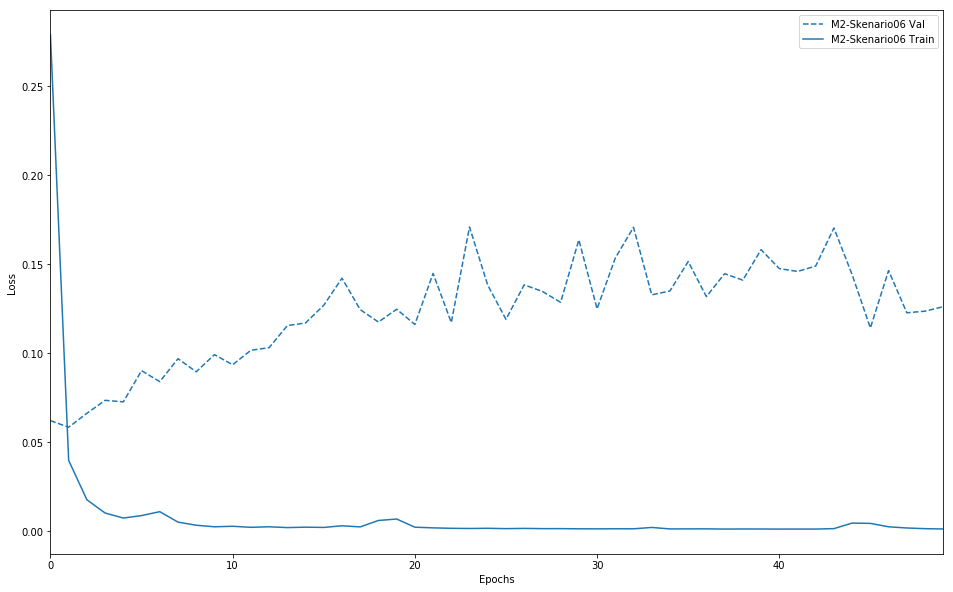

In [15]:
plot_history([('M2-Skenario06', history2)])

# Evaluasi 2

Evaluasi Data Test
Accuracy: 98.19 %
Precision: 97.98 %
Recall: 98.33 %


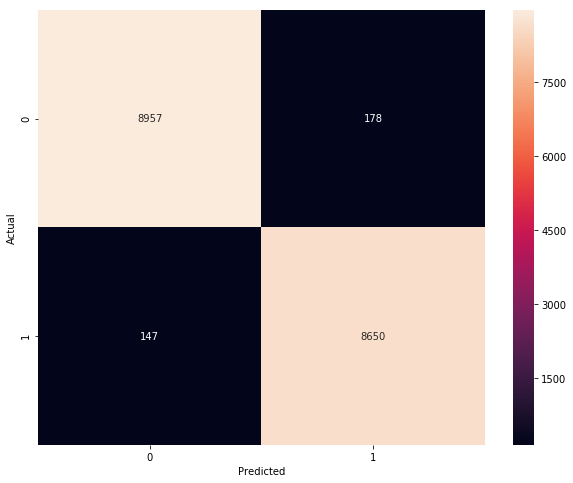

In [16]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model2, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
Accuracy: 99.95 %
Precision: 99.97 %
Recall: 99.93 %


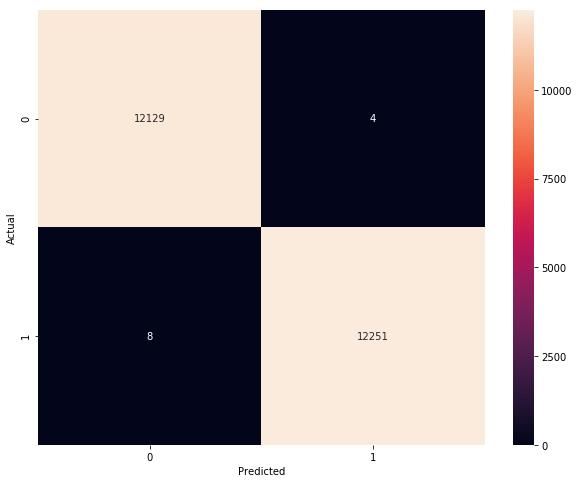

In [17]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model2, X_train, label_train)
conf_matrix(Y_act, Y_pred)

# Model 3

In [18]:
model3 = get_model3(X_train, Y_train)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 58, 32)            1325248   
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,333,634
Trainable params: 1,333,634
Non-trainable params: 0
_____________________________________________________________

In [19]:
# training model
history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))

Train on 24392 samples, validate on 12014 samples
Epoch 1/50
24392/24392 [==============================] - 19s 783us/step - loss: 0.5919 - acc: 0.6592 - val_loss: 0.3279 - val_acc: 0.9038
Epoch 2/50
24392/24392 [==============================] - 18s 743us/step - loss: 0.2786 - acc: 0.8942 - val_loss: 0.1541 - val_acc: 0.9540
Epoch 3/50
24392/24392 [==============================] - 18s 739us/step - loss: 0.1833 - acc: 0.9353 - val_loss: 0.1008 - val_acc: 0.9708
Epoch 4/50
24392/24392 [==============================] - 18s 740us/step - loss: 0.1462 - acc: 0.9500 - val_loss: 0.0774 - val_acc: 0.9785
Epoch 5/50
24392/24392 [==============================] - 18s 736us/step - loss: 0.1205 - acc: 0.9602 - val_loss: 0.0745 - val_acc: 0.9794
Epoch 6/50
24392/24392 [==============================] - 18s 736us/step - loss: 0.1100 - acc: 0.9642 - val_loss: 0.0696 - val_acc: 0.9802
Epoch 7/50
24392/24392 [==============================] - 18s 745us/step - loss: 0.1007 - acc: 0.9667 - val_loss: 0.

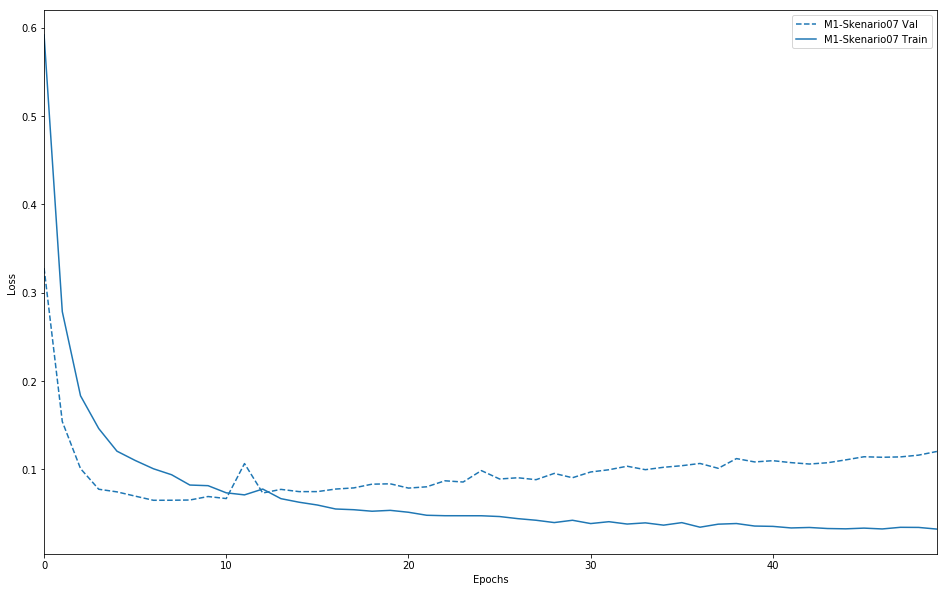

In [20]:
plot_history([('M1-Skenario07', history3)])

# Evaluasi 3

Evaluasi Data Test
Accuracy: 96.96 %
Precision: 96.36 %
Recall: 97.48 %


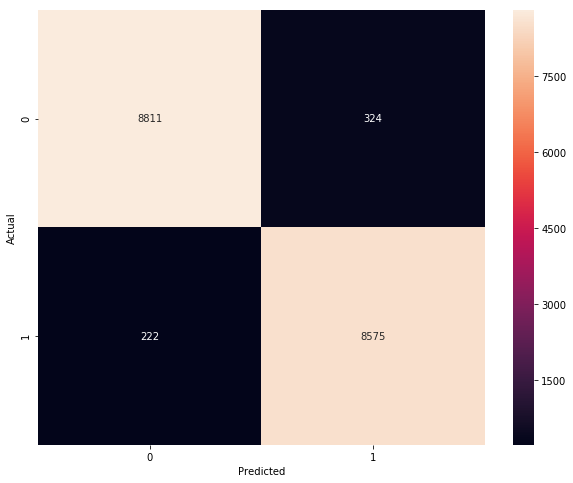

In [21]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model3, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
Accuracy: 99.88 %
Precision: 99.89 %
Recall: 99.87 %


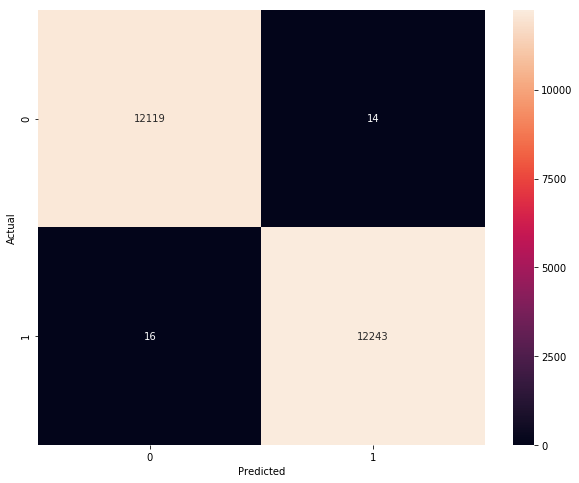

In [22]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model3, X_train, label_train)
conf_matrix(Y_act, Y_pred)

# Model 4

In [23]:
model4 = get_model4(X_train, Y_train)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 58, 128)           5300992   
_________________________________________________________________
dropout_3 (Dropout)          (None, 58, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 5,432,834
Trainable params: 5,432,834
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# training model
history4 = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))

Train on 24392 samples, validate on 12014 samples
Epoch 1/50
24392/24392 [==============================] - 21s 856us/step - loss: 0.4567 - acc: 0.7678 - val_loss: 0.1664 - val_acc: 0.9477
Epoch 2/50
24392/24392 [==============================] - 20s 806us/step - loss: 0.1286 - acc: 0.9583 - val_loss: 0.0766 - val_acc: 0.9789
Epoch 3/50
24392/24392 [==============================] - 20s 808us/step - loss: 0.0803 - acc: 0.9774 - val_loss: 0.0591 - val_acc: 0.9839
Epoch 4/50
24392/24392 [==============================] - 20s 806us/step - loss: 0.0657 - acc: 0.9806 - val_loss: 0.0556 - val_acc: 0.9846
Epoch 5/50
24392/24392 [==============================] - 20s 819us/step - loss: 0.0545 - acc: 0.9842 - val_loss: 0.0552 - val_acc: 0.9845
Epoch 6/50
24392/24392 [==============================] - 20s 809us/step - loss: 0.0467 - acc: 0.9861 - val_loss: 0.0573 - val_acc: 0.9835
Epoch 7/50
24392/24392 [==============================] - 20s 810us/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.

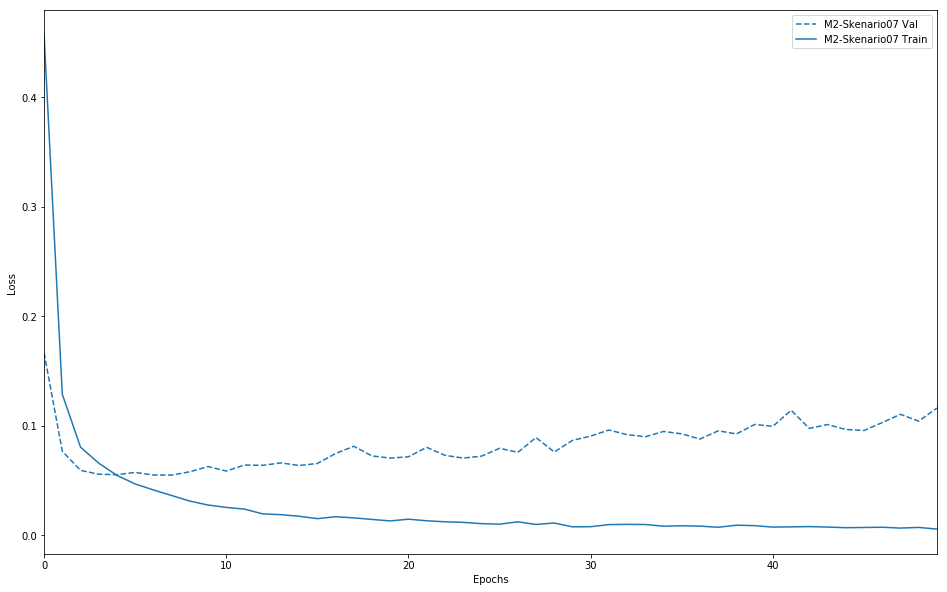

In [25]:
plot_history([('M2-Skenario07', history4)])

# Evaluasi 4

Evaluasi Data Test
Accuracy: 97.54 %
Precision: 96.64 %
Recall: 98.41 %


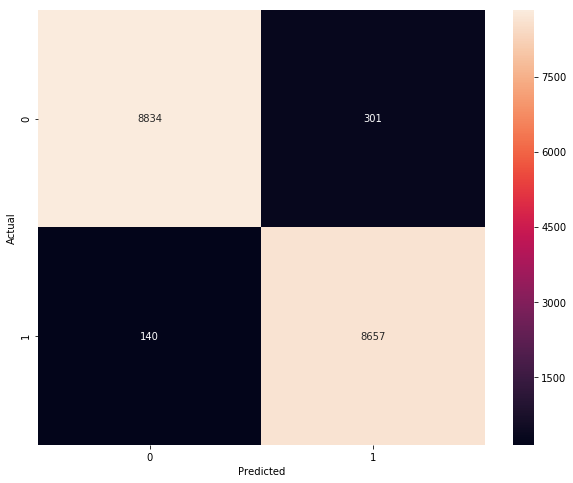

In [26]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model4, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
Accuracy: 99.93 %
Precision: 99.95 %
Recall: 99.91 %


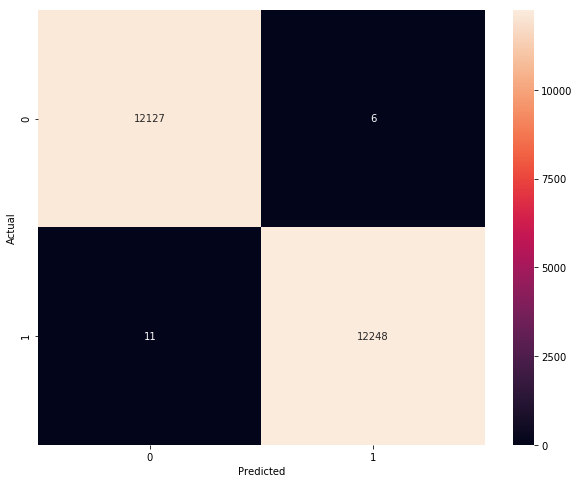

In [27]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model4, X_train, label_train)
conf_matrix(Y_act, Y_pred)

# Grafik Keseluruhan 

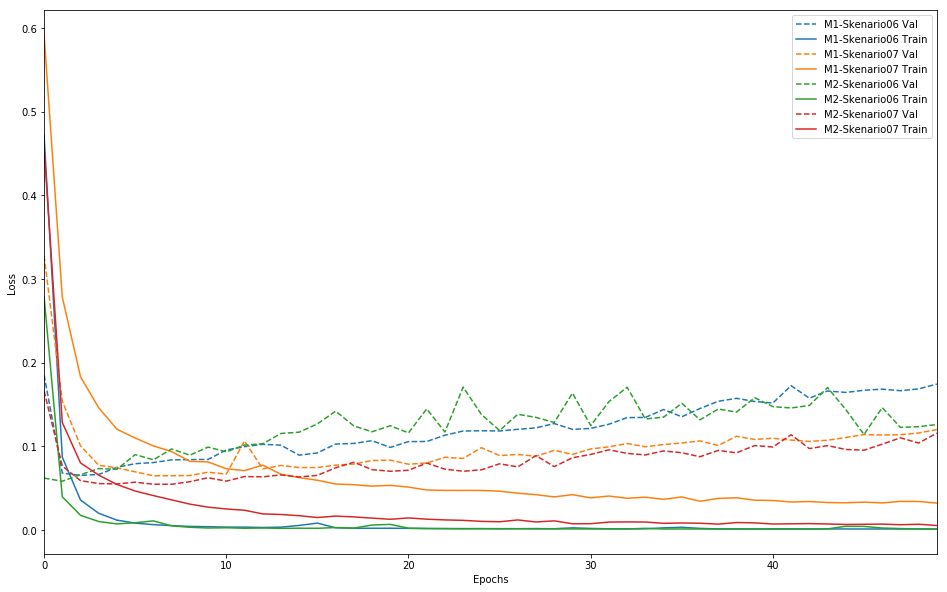

In [28]:
plot_history([('M1-Skenario06', history1),
              ('M1-Skenario07', history3),
              ('M2-Skenario06', history2),
              ('M2-Skenario07', history4)])

# Save Model

In [0]:
model1.save('model/M1-Skenario06.h5')
model2.save('model/M2-Skenario06.h5')
model3.save('model/M1-Skenario07.h5')
model4.save('model/M2-Skenario07.h5')